In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [91]:
def parse_stats(stats):
    node_idxs = {n: i for i, n in enumerate(stats)}
    activations = [n for n in stats if stats[n]['type'] == 'activation']
    activation_idxs = [node_idxs[n] for n in activations]
    
    forward_last_idxs = [
        node_idxs[stats[n]['activation_unused_range'][0]]
        for n in activations
    ]
    backward_first_idxs = [
        node_idxs[stats[n]['activation_unused_range'][1]]
        for n in activations
    ]
    
    type_masks = {
        type: [False] * len(stats)
        for type in ('parameter', 'other', 'activation', 'gradient')
    }
    for i, n in enumerate(stats):
        type = stats[n]['type']
        type_masks[type][i] = True
    
    name_masks = {}
    for i, n in enumerate(stats):
        n = n.split('_')
        if n[-1].isnumeric():
            n.pop()
        name = '_'.join(s for s in n)
        if name not in name_masks:
            name_masks[name] = [False] * len(stats)
        name_masks[name][i] = True

    return node_idxs, activations, activation_idxs, \
           forward_last_idxs, backward_first_idxs, type_masks, name_masks

In [98]:
def plot(stats, title):
    node_idxs, activations, activation_idxs, \
    forward_last_idxs, backward_first_idxs, type_masks, name_masks = \
    parse_stats(stats)
    
    fig, axes = plt.subplots(2, 2, figsize=(10,8))
    axes = axes.flatten()
    
    for type, mask in type_masks.items():
        indices = np.arange(len(stats))[mask]
        time = np.array([v['time'] for v in stats.values()])[mask]
        axes[0].plot(indices, time, label=type)
    axes[0].set_xlabel('Node')
    axes[0].set_ylabel('Runtime (milliseconds)')
    axes[0].set_title('Runtimes (batch size 8)')
    axes[0].legend()
    
    for type, mask in type_masks.items():
        indices = np.arange(len(stats))[mask]
        memory = np.array([v['memory'] for v in stats.values()])[mask]
        axes[1].plot(indices, memory/2**30, label=type)
    axes[1].set_xlabel('Node')
    axes[1].set_ylabel('Memory (GB)')
    axes[1].set_title('Memory consumption (batch size 8)')
    axes[1].legend()
    
    axes[2].scatter(activation_idxs, forward_last_idxs, marker='.', label='forward pass last use')
    axes[2].scatter(activation_idxs, backward_first_idxs, marker='.', label='backward pass first use')
    axes[2].set_xlabel('Activation node')
    axes[2].set_ylabel('Last/first node to use\nin forward/backward pass')
    axes[2].set_title('Last/first use of each activation node\nin forward/backward pass')
    axes[2].legend()
    
    axes[3].bar(batch_sizes.astype(str), peak_mems/2**30)
    axes[3].set_xlabel('Batch size')
    axes[3].set_ylabel('Peak memory consumption (GB)')
    axes[3].set_title('Peak memory consumption vs. batch size')
    
    fig.suptitle(title)
    fig.tight_layout()

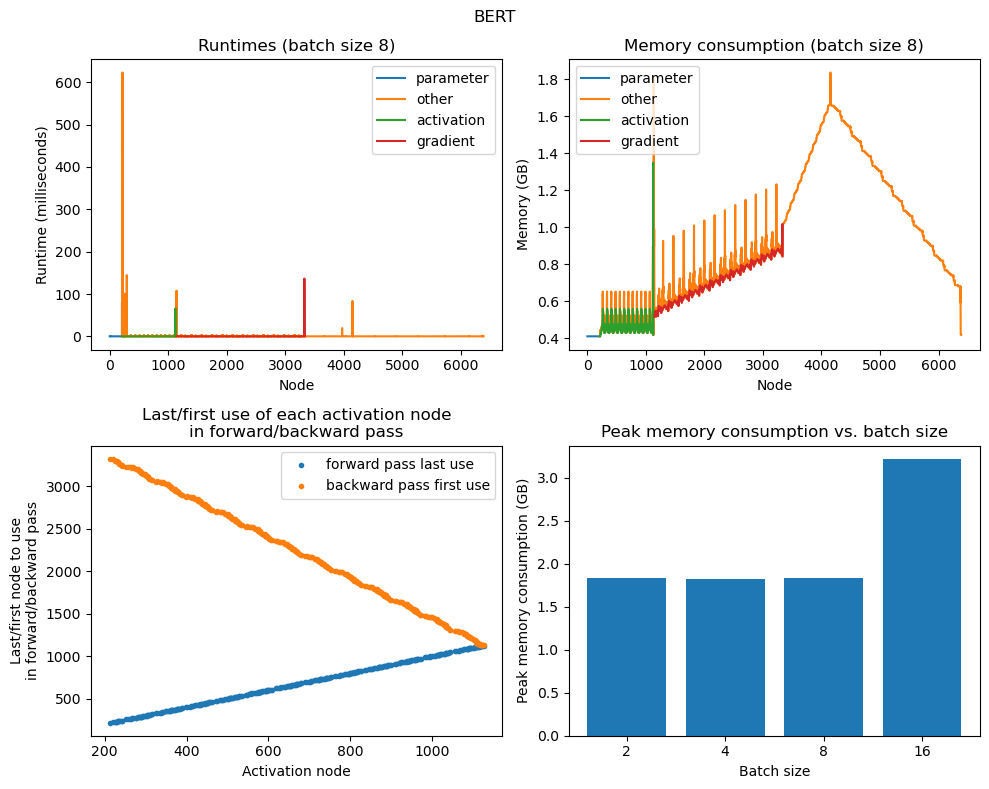

In [99]:
with open('stats_bert.json') as f:
    stats = json.load(f)

batch_sizes = np.array([2, 4, 8, 16])
peak_mems = np.array([1970479104, 1958651904, 1972420608, 3448873472])

plot(stats, 'BERT')

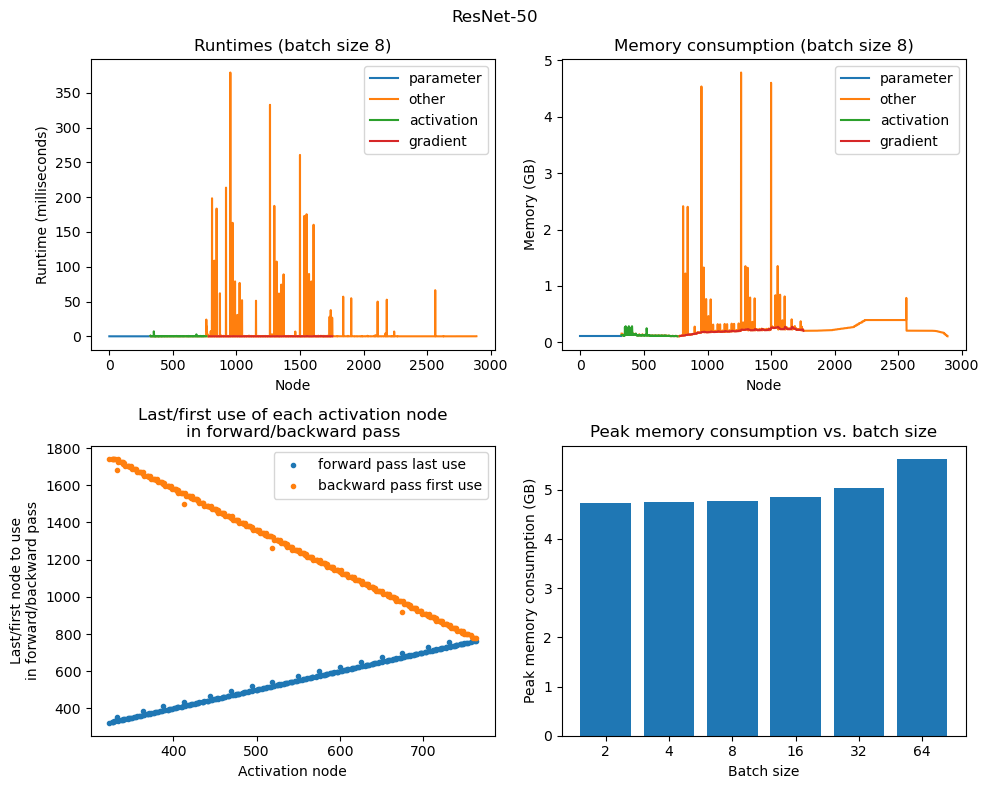

In [102]:
with open('stats_resnet50.json') as f:
    stats = json.load(f)

batch_sizes = np.array([2, 4, 8, 16, 32, 64])
peak_mems = np.array([5074159104, 5095303168, 5132822528, 5216610304, 5409779200, 6031126528])

plot(stats, 'ResNet-50')

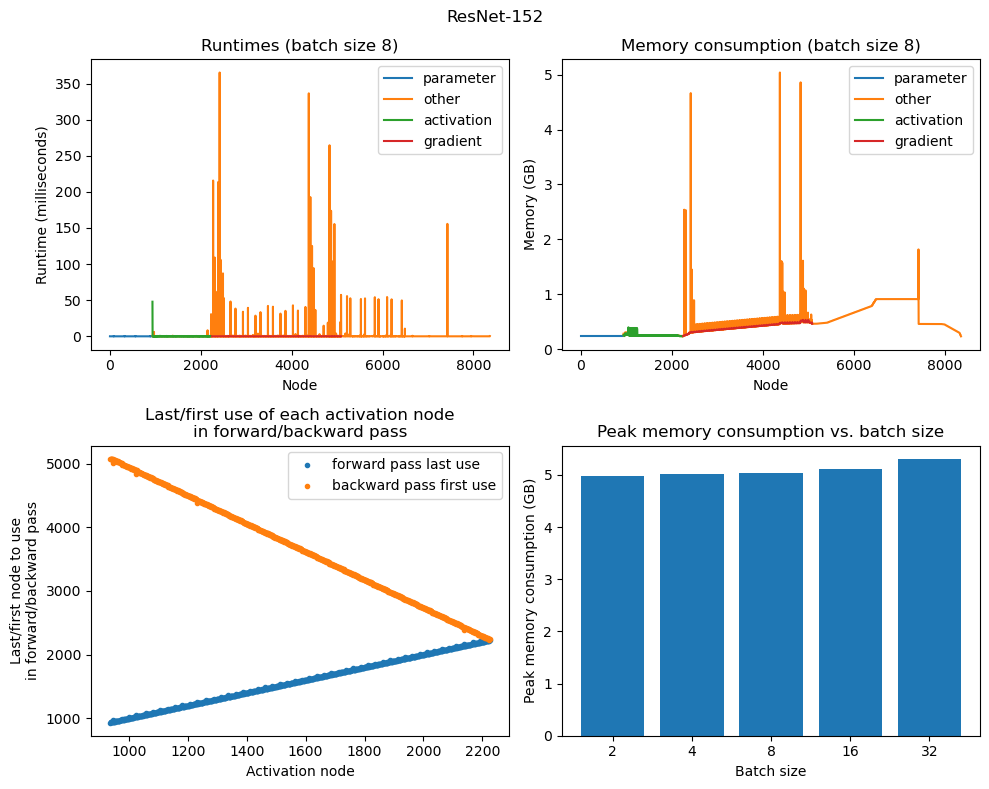

In [103]:
with open('stats_resnet152.json') as f:
    stats = json.load(f)

batch_sizes = np.array([2, 4, 8, 16, 32])
peak_mems = np.array([5350134272, 5390373888, 5408953344, 5493789696, 5688162816])

plot(stats, 'ResNet-152')

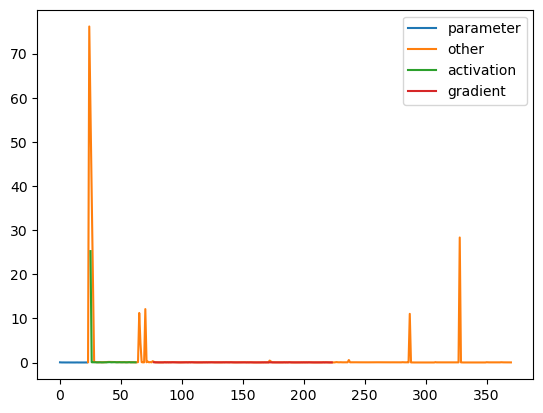

In [74]:
for type, mask in type_masks.items():
    indices = np.arange(len(stats))[mask]
    time = np.array([v['time'] for v in stats.values()])[mask]
    plt.plot(indices, time, label=type)
plt.legend()

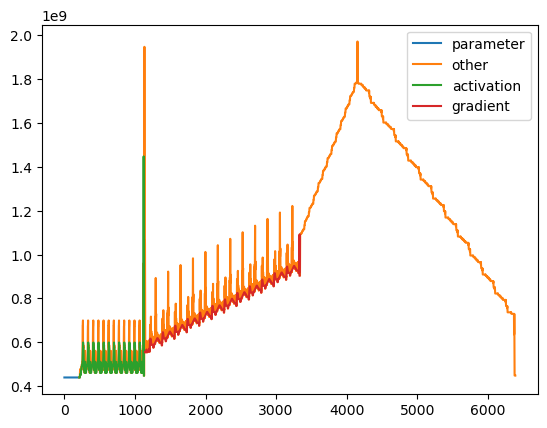

In [3]:
for type, mask in type_masks.items():
    indices = np.arange(len(stats))[mask]
    memory = np.array([v['memory'] for v in stats.values()])[mask]
    plt.plot(indices, memory, label=type)
plt.legend()

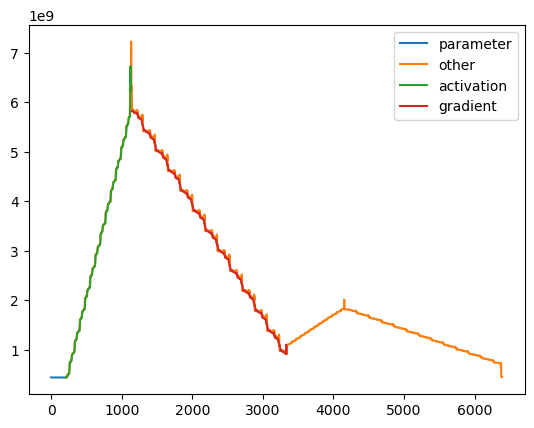

In [9]:
for type, mask in type_masks.items():
    indices = np.arange(len(stats))[mask]
    memory = np.array([v['memory'] for v in stats.values()])[mask]
    plt.plot(indices, memory, label=type)
plt.legend()

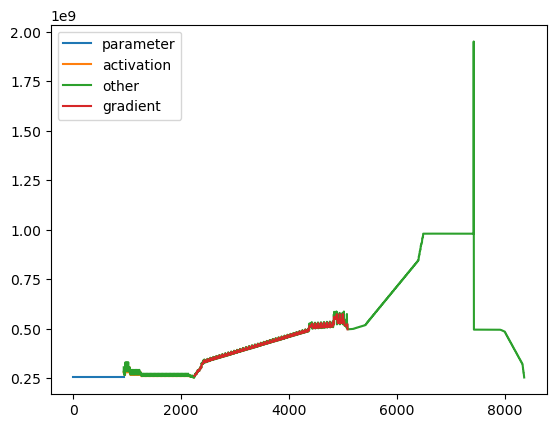

In [5]:
for type, mask in type_masks.items():
    indices = np.arange(len(stats))[mask]
    memory = np.array([v['memory'] for v in stats.values()])[mask]
    plt.plot(indices, memory, label=type)
plt.legend()

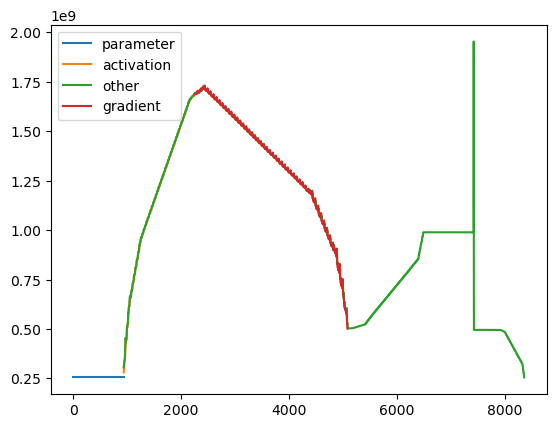

In [7]:
for type, mask in type_masks.items():
    indices = np.arange(len(stats))[mask]
    memory = np.array([v['memory'] for v in stats.values()])[mask]
    plt.plot(indices, memory, label=type)
plt.legend()

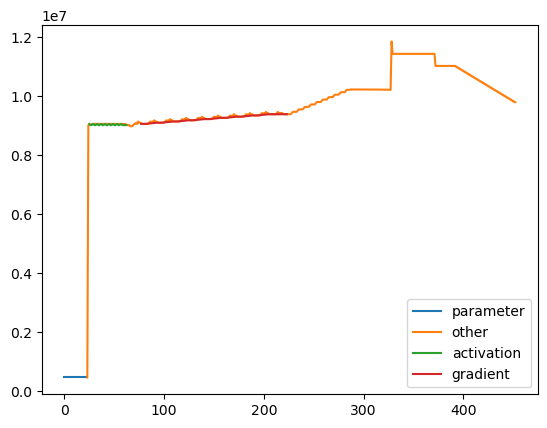

In [12]:
for type, mask in type_masks.items():
    indices = np.arange(len(stats))[mask]
    memory = np.array([v['memory'] for v in stats.values()])[mask]
    plt.plot(indices, memory, label=type)
plt.legend()

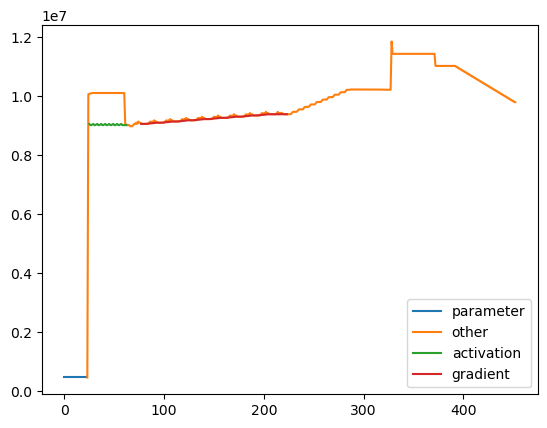

In [4]:
for type, mask in type_masks.items():
    indices = np.arange(len(stats))[mask]
    memory = np.array([v['memory'] for v in stats.values()])[mask]
    plt.plot(indices, memory, label=type)
plt.legend()

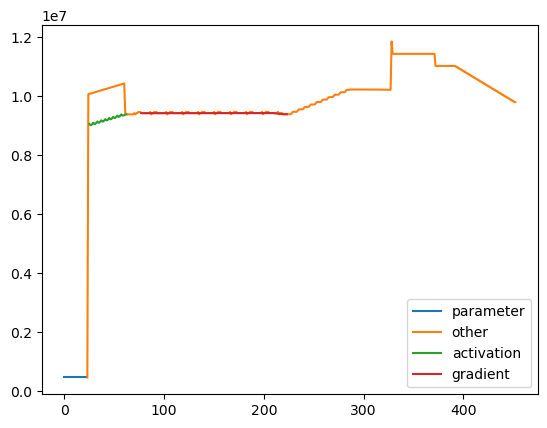

In [8]:
for type, mask in type_masks.items():
    indices = np.arange(len(stats))[mask]
    memory = np.array([v['memory'] for v in stats.values()])[mask]
    plt.plot(indices, memory, label=type)
plt.legend()

(-100.0, 100000.0)

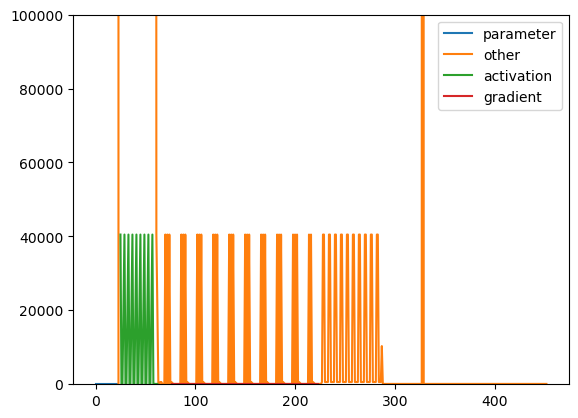

In [26]:
for type, mask in type_masks.items():
    indices = np.arange(len(stats))[mask]
    memory = np.array([v['memory'] for v in stats.values()])[mask]
    plt.plot(indices, memory, label=type)
plt.legend()
plt.ylim(-100, 100000)

(-100.0, 100000.0)

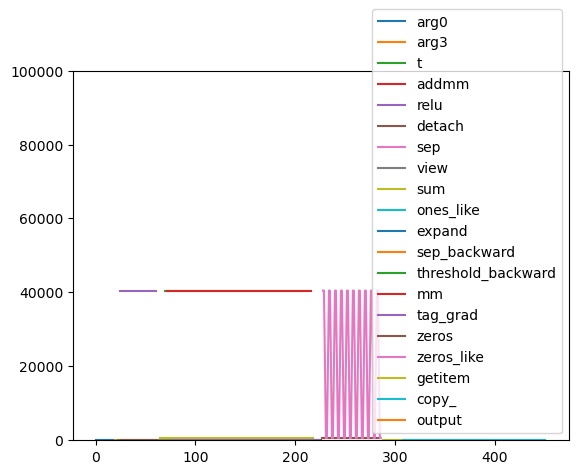

In [37]:
for name, mask in name_masks.items():
    indices = np.arange(len(stats))[mask]
    memory = np.array([v['memory'] for v in stats.values()])[mask]
    plt.plot(indices, memory, label=name)
plt.legend()
plt.ylim(-100, 100000)

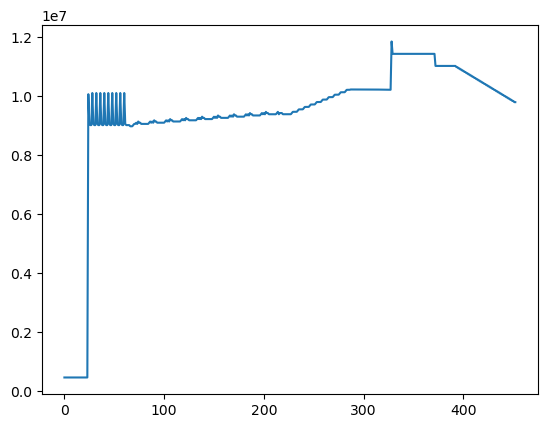

In [5]:
plt.plot([stats[n]['memory'] for n in stats])

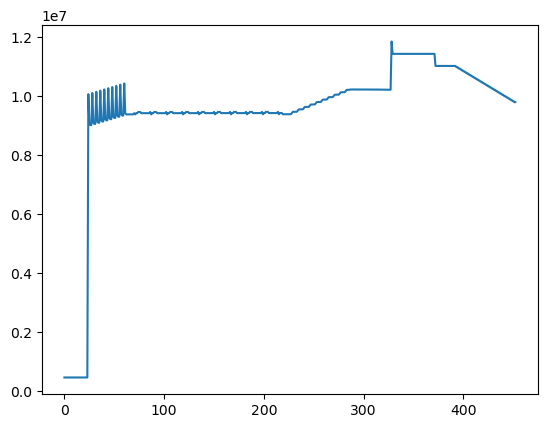

In [9]:
plt.plot([stats[n]['memory'] for n in stats])